The objective of this problem is to explore the data and reduce the number of features by using dimensionality reduction techniques like PCA and TSNE and generate meaningful insights on the auto mph data set.

-----------------------------
## Dataset: 
-----------------------------
There are 8 variables in the data: 

- mpg: miles per gallon
- cyl: number of cylinders
- disp: engine displacement (cu. inches) or engine size
- hp: horsepower
- wt: vehicle weight (lbs.)
- acc: time taken to accelerate from O to 60 mph (sec.)
- yr: model year
- car name: car model name

## Importing necessary libraries and overview of the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler

#importing PCA and TSNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#### Loading data

In [2]:
data = pd.read_csv("auto-mpg.csv")

In [3]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino


#### Check the info of the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


**Observations:**

- There are 398 observations and 8 columns in the data.
- All variables except horsepower and car name are of numeric data type.
- The horsepower must be a numeric data type. We will explore this further.

## Data Preprocessing and Exploratory Data Analysis

In [5]:
data["car name"].nunique()

305

- The column 'car name' is of object data type containing a lot of unique entries and would not add values to our analysis. We can drop this column.

In [6]:
# dropping car_name
data1 = data.copy()
data = data.drop(['car name'], axis=1)

#### Checking values in horsepower column

In [7]:
# checking if there are values other than digits in the column 'horsepower' 
hpIsDigit = pd.DataFrame(data.horsepower.str.isdigit())  # if the string is made of digits store True else False

# print isDigit = False!
data[hpIsDigit['horsepower'] == False]   # from temp take only those rows where hp has false

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,?,2046,19.0,71
126,21.0,6,200.0,?,2875,17.0,74
330,40.9,4,85.0,?,1835,17.3,80
336,23.6,4,140.0,?,2905,14.3,80
354,34.5,4,100.0,?,2320,15.8,81
374,23.0,4,151.0,?,3035,20.5,82


**Observations:**
- There are 6 observations where horsepower is ?.
- We can consider these values as missing values.
- Let's impute these missing values and change the data type of horsepower column.
- First we need to replace the ? with np.nan.

In [8]:
#Relacing ? with np.nan
data = data.replace('?', np.nan)
data[hpIsDigit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,NaN,2046,19.0,71
126,21.0,6,200.0,NaN,2875,17.0,74
330,40.9,4,85.0,NaN,1835,17.3,80
336,23.6,4,140.0,NaN,2905,14.3,80
354,34.5,4,100.0,NaN,2320,15.8,81
374,23.0,4,151.0,NaN,3035,20.5,82


In [9]:
# Imputing the missing values with median value
data.horsepower.fillna(data.horsepower.median(), inplace=True)
data['horsepower'] = data['horsepower'].astype('float64')  # converting the hp column from object data type to float

#### Summary Statistics

In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


**Observations:________**

There were 398 data observations in this data set.

The standard deviation (SD) is high for displacement, and weight. The SD means moderate for mpg and horsepower.

The average cylinders, displacement, horsepower, weight, and accelaration were 5.454774, 193.425879, 104.304020, 2970.424623, and 15.568090 respectively.

The average number of mpg and model year are 23.514573 and 76.010050 respectively.

The min and max weight variable has a large range. 

The min and max of the displacement variable has a large range.

#### Let's check the distribution and outliers for each column in the data

mpg
Skew : 0.46


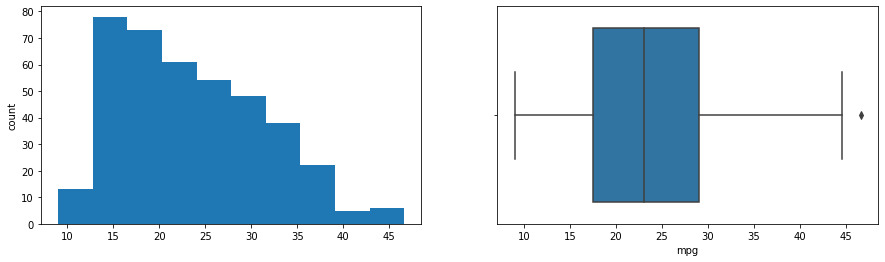

cylinders
Skew : 0.53


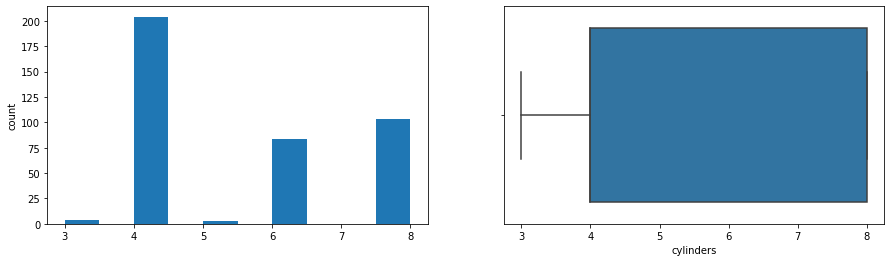

displacement
Skew : 0.72


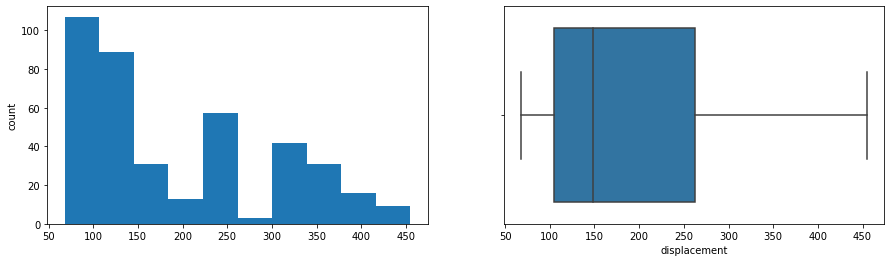

horsepower
Skew : 1.11


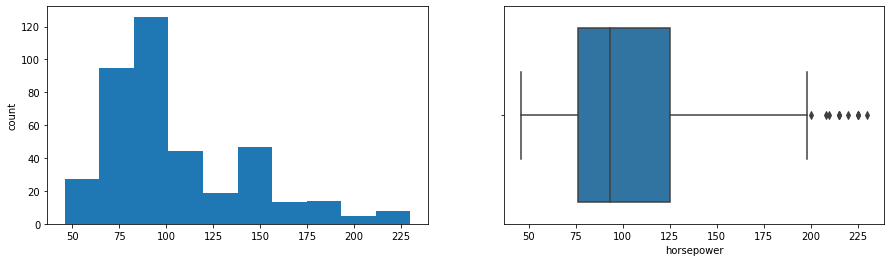

weight
Skew : 0.53


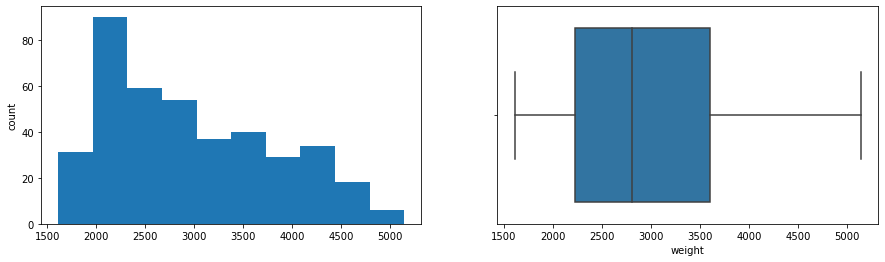

acceleration
Skew : 0.28


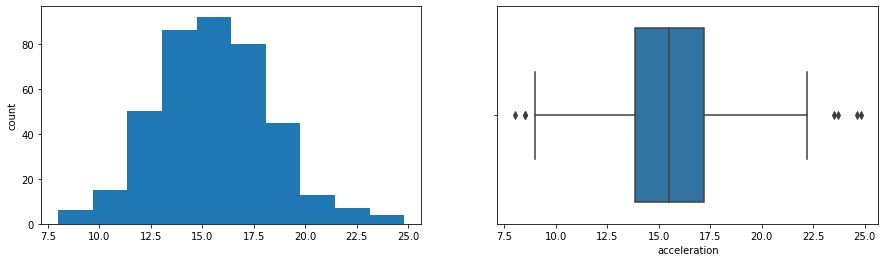

model year
Skew : 0.01


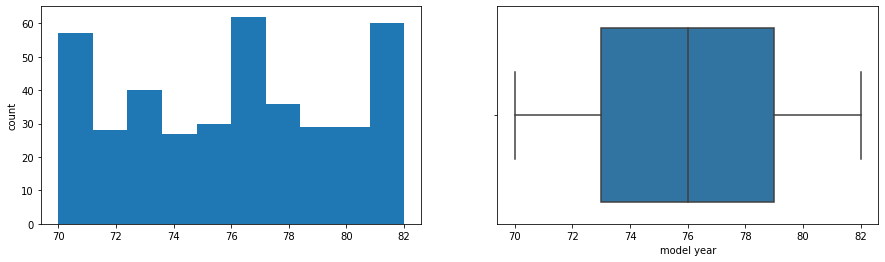

In [18]:
cont_cols = list(data.columns)
for col in cont_cols:
    print(col)
    print('Skew :',round(data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

**Observations:_____________**

The distribution plots shows that mpg, cylinders, displacement, weight, and acceleration have a skews of between 0 and 1, which means they are skewed to the left slightly.

Horsepower seams to have the largest skew value of 1.11. Horsepower also has the most outliers to the right of the box plot.

The variables with outliers are mpg, horsepower, and accelleration. Accellaration has outliers to the left and right of the boxplot, which my cancel each other out in some statistical regards.

Model year is nearly perfectly symmetrical distribution with a skew value of 0.01.

Weight, model year, and displacement are the variables that do not possess outliers.

#### Checking correlation

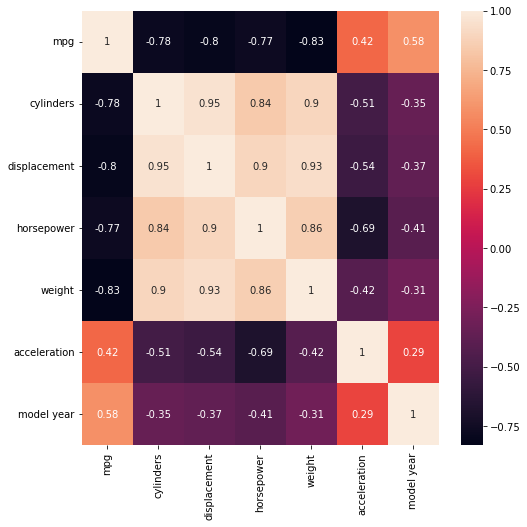

In [12]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), annot=True)
plt.show()

**Observations:**
- The variable mpg has strong negative correlation with cylinders, displacement, horsepower, and weight.
- horsepower and acceleration are negatively correlated.
- The variable weight has strong positively correlation with horsepower, displacement and cylinders
- model year is positively correlated with mpg.

#### Scaling the data

In [13]:
# scaling the data
scaler=StandardScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [14]:
data_scaled.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426


## Principal Component Analysis

In [19]:
#Defining the number of principal components to generate 
n=data_scaled.shape[1]

#Finding principal components for the data
pca = PCA(n_components=n, random_state=1) #Apply the PCA algorithm with random state = 1
data_pca1 = pd.DataFrame(pca.fit_transform(data_scaled)) #Fit and transform the pca function on scaled data
#The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_

Text(0, 0.5, 'Cumulative Explained Variance')

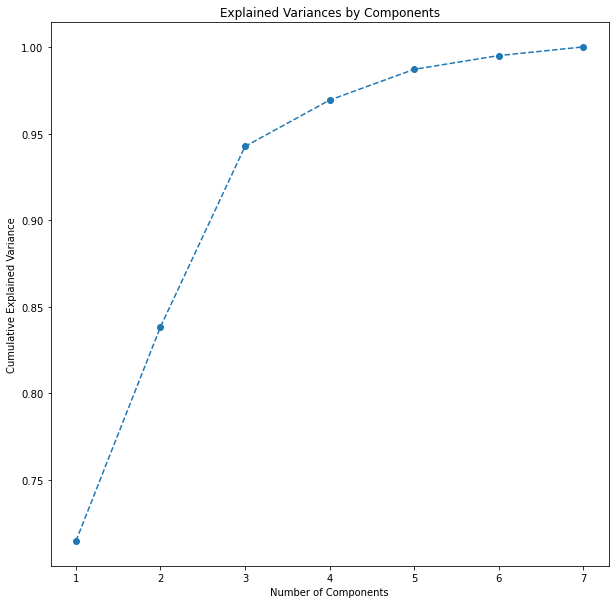

In [20]:
# visualize the explained variance by individual components
plt.figure(figsize = (10,10))
plt.plot(range(1,8), exp_var.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

In [21]:
# find the least number of components that can explain more than 90% variance
sum = 0
for ix, i in enumerate(exp_var):
  sum = sum + i
  if(sum>0.90):
    print("Number of PCs that explain at least 90% variance: ", ix+1)
    break

Number of PCs that explain at least 90% variance:  3


**Observations:___________________**

Out of the original 7 components before PCA (there were 8 total, however, we removed car name), we reduce our components down to 3. These three components represent at least 90% of the variance of the data set.

This results in a 57.1429% decrease from out original 7 components.



In [23]:
pc_comps = ['PC1','PC2','PC3']
data_pca = pd.DataFrame(np.round(pca.components_[:3,:],2),index=pc_comps,columns=data_scaled.columns)
data_pca.T

,PC1,PC2,PC3
mpg,-0.40,-0.21,-0.26
cylinders,0.42,-0.19,0.14
displacement,0.43,-0.18,0.10
horsepower,0.42,-0.09,-0.17
weight,0.41,-0.22,0.28
acceleration,-0.28,0.02,0.89
model year,-0.23,-0.91,-0.02


In [24]:
def color_high(val):
    if val <= -0.40: # you can decide any value as per your understanding
        return 'background: pink'
    elif val >= 0.40:
        return 'background: skyblue'   
    
data_pca.T.style.applymap(color_high)

,PC1,PC2,PC3
mpg,-0.400000,-0.210000,-0.260000
cylinders,0.420000,-0.190000,0.140000
displacement,0.430000,-0.180000,0.100000
horsepower,0.420000,-0.090000,-0.170000
weight,0.410000,-0.220000,0.280000
acceleration,-0.280000,0.020000,0.890000
model year,-0.230000,-0.910000,-0.020000


**Observations:__________________**

We have three principle component groups: PC1, PC2, and PC3:

PC1 looks like it relates high values in regard to cylinders, displacement, horsepower, and weight. It also has a high negative value of mpg as well. This might mean that this principle component group puts cars with higher performance aspects into a group (larger engine size (displacement), horsepower, weight, and number of cylinders).

PC2 looks like it relates the model year (low values) as its primary importance into a group.

PC3 looks like it relates acceleration into a group as its primary importance.


#### We can also visualize the data in 2 dimensions using first two principal components 

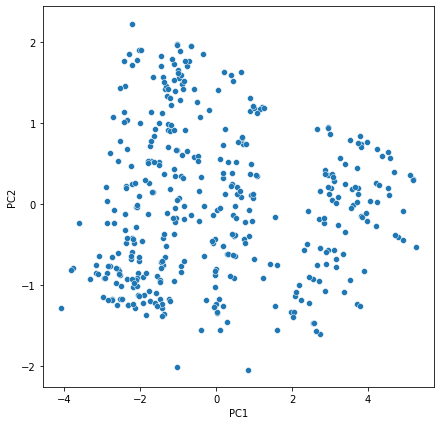

In [49]:
plt.figure(figsize = (7,7))
sns.scatterplot(x=data_pca1[0],y=data_pca1[1], data = data)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


**Let's try adding hue to the scatter plot**

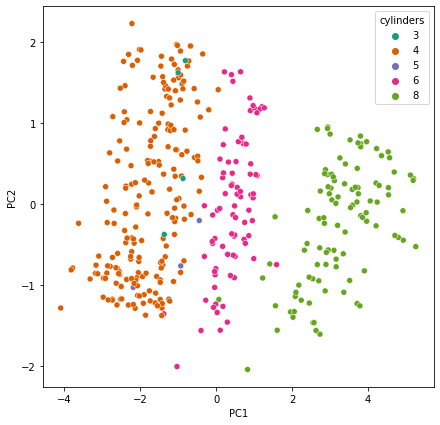

In [50]:
plt.figure(figsize = (7,7))
sns.scatterplot(x=data_pca1[0],y=data_pca1[1], data = data, hue = "cylinders", palette = "Dark2")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

**Observations:___________**

I can now see the data as three specific groups with the most data points. I see an orange group with data on 4 cylinders, a pink group in the middle, with 6 cylinders, and a green group on the right with 8 cylinders. 

There are a very few data points shown with dark teal that represents data points with 3 cylinders.

## t-SNE

In [55]:
tsne = TSNE(n_components = 2, random_state=1, perplexity=i)
data_tsne = tsne.fit_transform(data_scaled)
data_tsne

array([[-24.089859  ,  -8.928798  ],
       [-24.502604  , -10.394567  ],
       [-24.550003  ,  -9.480212  ],
       [-24.113     ,  -9.513984  ],
       [-24.583387  ,  -9.233955  ],
       [-25.978842  , -12.587259  ],
       [-26.662134  , -12.8092575 ],
       [-26.632784  , -12.597231  ],
       [-26.49875   , -13.122606  ],
       [-26.210346  , -11.465923  ],
       [-25.483524  , -10.644025  ],
       [-25.837994  , -10.121454  ],
       [-25.514004  , -10.262278  ],
       [-27.034204  , -11.917838  ],
       [ 14.792789  ,  -0.25979218],
       [  0.21595754,  -8.657918  ],
       [ -0.0536604 ,  -8.615396  ],
       [  0.38842604,  -8.880054  ],
       [ 15.477712  ,  -0.7636745 ],
       [ 19.412973  ,   5.195414  ],
       [ 17.692648  ,   1.300524  ],
       [ 14.652949  ,  -0.66123325],
       [ 17.485723  ,   1.2684846 ],
       [ 14.6317425 ,  -1.6834857 ],
       [  0.4704422 ,  -8.561479  ],
       [-23.800388  , -15.133829  ],
       [-23.064106  , -15.262308  ],
 

In [56]:
data_tsne.shape

(398, 2)

In [57]:
data_tsne = pd.DataFrame(data = data_tsne, columns = ['Component 1', 'Component 2'])

In [58]:
data_tsne.head()

,Component 1,Component 2
0,-24.089859,-8.928798
1,-24.502604,-10.394567
2,-24.550003,-9.480212
3,-24.113001,-9.513984
4,-24.583387,-9.233955


<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

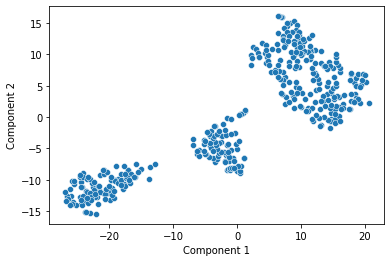

In [59]:
sns.scatterplot(x=data_tsne.iloc[:,0],y=data_tsne.iloc[:,1])

<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

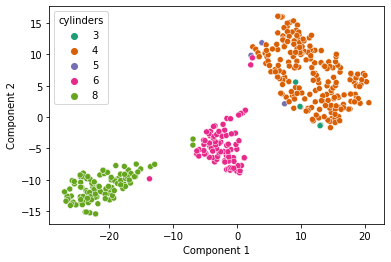

In [61]:
# Let's see scatter plot of the data w.r.t number of cylinders
sns.scatterplot(x=data_tsne.iloc[:,0],y=data_tsne.iloc[:,1],hue=data.cylinders, palette="Dark2")

**Observations:______________**

I can clearly see three clusters of data from the tsne code.

This means I can label three clusters.

I would probably run this again later with perplexities added in to gain possible insight too.

In [63]:
# Let's assign points to 3 different groups
def grouping(x):
    first_component = x['Component 1']
    second_component = x['Component 2']
    if (first_component> 0) and (second_component >0): 
        return 'group_1'
    if (first_component >-20 ) and (first_component < 5):
        return 'group_2'
    else: 
        return 'group_3'

In [64]:
data_tsne['groups'] = data_tsne.apply(grouping,axis=1)

<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

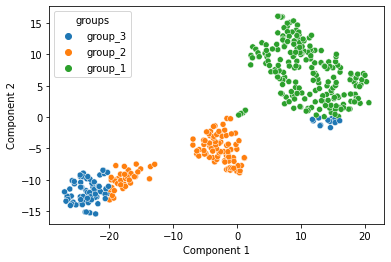

In [65]:
sns.scatterplot(x=data_tsne.iloc[:,0],y=data_tsne.iloc[:,1],hue=data_tsne.iloc[:,2])

In [66]:
data['groups'] = data_tsne['groups'] 

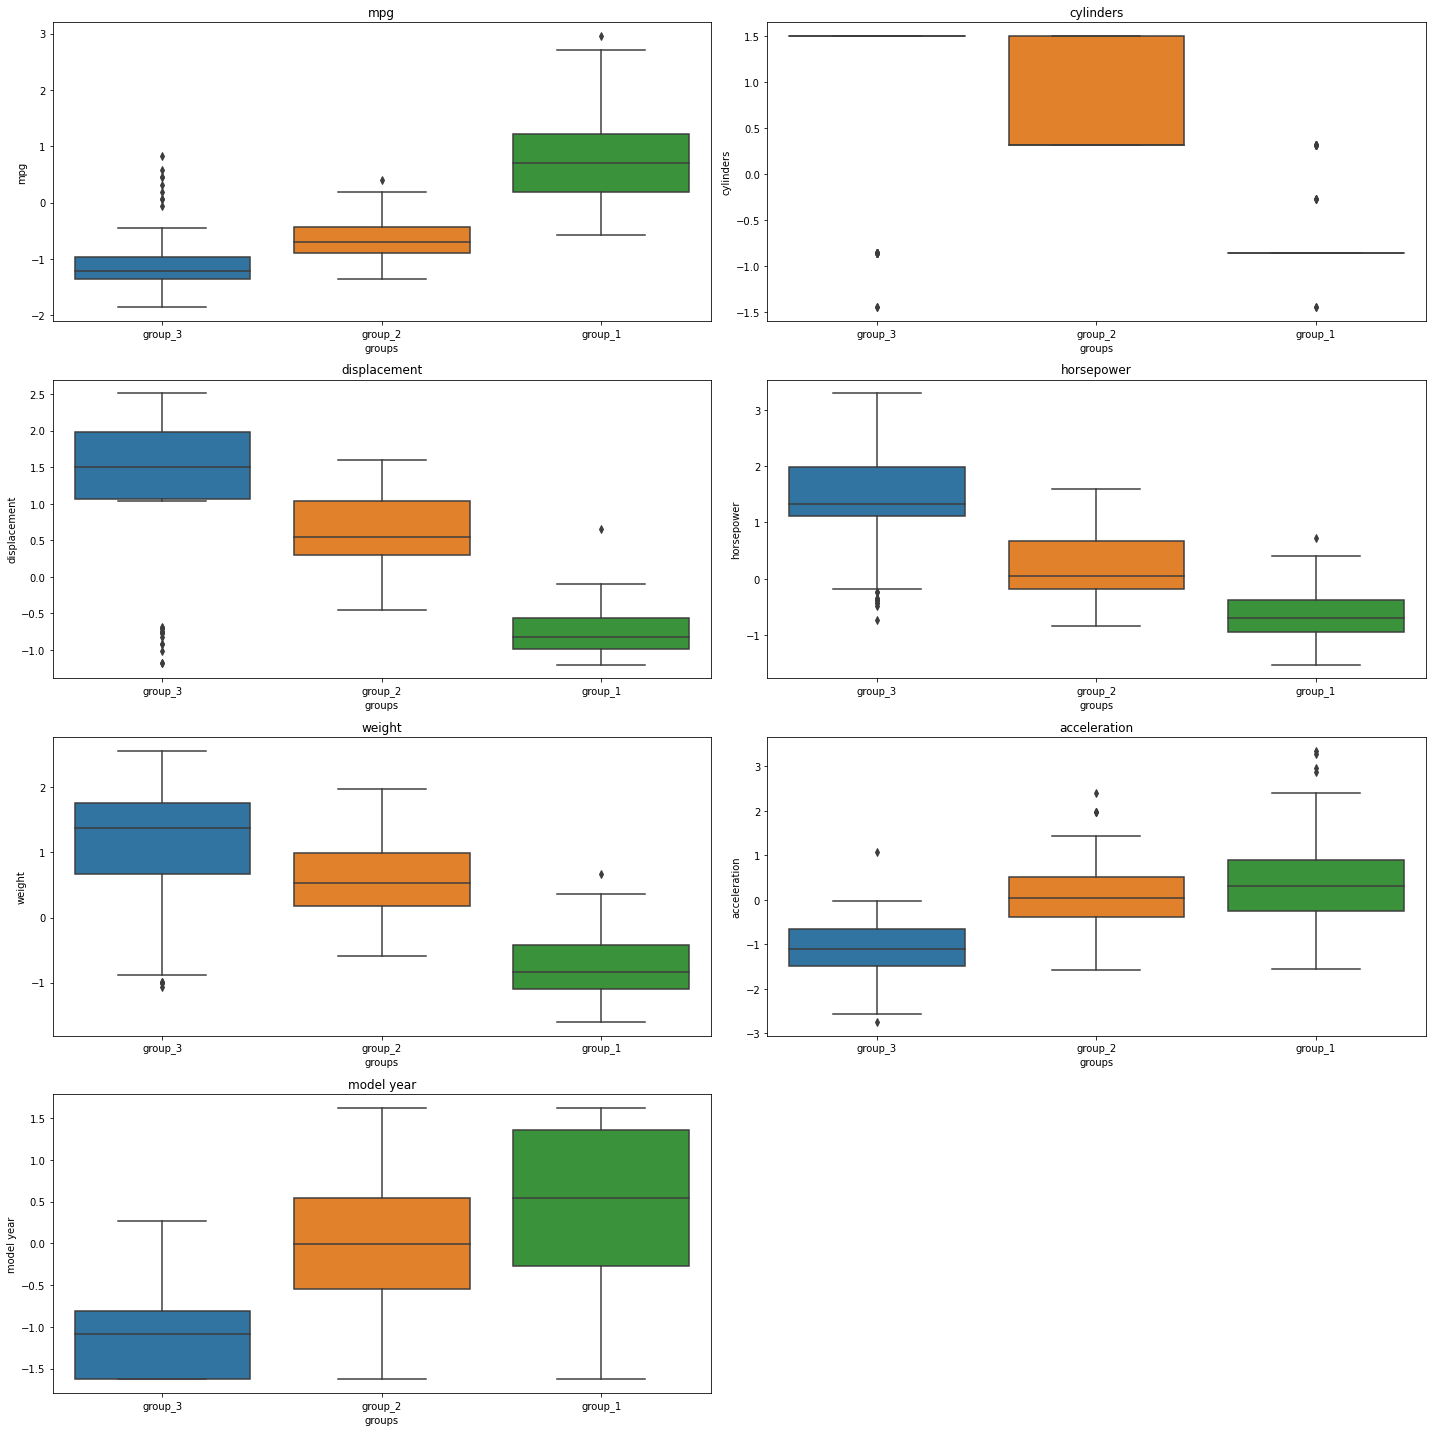

In [68]:
all_col = data.columns.tolist()
plt.figure(figsize=(20, 20))

for i, variable in enumerate(all_col):
    if i==7:
        break
    plt.subplot(4, 2, i + 1)
    #Create boxplot with groups on the x-axis and variable on the y-axis (use the dataframe data)
    sns.boxplot(y=data_scaled[variable], x=data_tsne['groups'])
    plt.tight_layout()
    plt.title(variable)
plt.show()

**Observations:___________**

There are three groups in the data with each group having different characteristics.

Group 1 appears to represent newer model year cars, with smaller weights, high acceleration less horsepower, smaller engine size, least amount of cylinders, and better mpg.

Group 2 appears to represent mid level model year cars, with weights, horsepower, acceleration, and cylinder numbers in the middle of the two groups. They seem to be the Goldilock group with all variables in the middle.

Group 3 appears to be older cars with slower acceleration, heaviest weight, largest engine size, largest amount of cylinders, highest horsepower, and lowest mpg. This might be a classic car group.